In [133]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [134]:
geo_dataframe = gpd.read_file("../data/raw/illinois-counties.geojson")
era5 = pd.read_csv("../data/raw/ERA5.csv")
evi = pd.read_csv("../data/raw/EVI.csv")
evi_stacked = pd.read_csv("../data/raw/EVI_stacked.csv")
il_yield = pd.read_csv("../data/raw/IL_yield.csv")

The enhanced vegetation index (EVI) is an 'optimized' vegetation index designed to enhance the
vegetation signal with improved sensitivity in high biomass regions and improved vegetation
monitoring through a de-coupling of the canopy background signal and a reduction in atmosphere
influences.

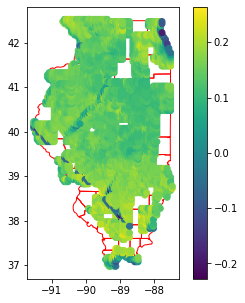

In [164]:
df_plot = evi_stacked[evi_stacked["year"] == 2019]
fig, ax = plt.subplots(figsize=(5, 5))
geo_dataframe.plot(ax=ax, facecolor='none', edgecolor='red')
plt.scatter(df_plot["long"], df_plot["lat"], c=df_plot["evi_1"])
plt.colorbar()

In [136]:
geo_dataframe = gpd.read_file("../data/raw/illinois-counties.geojson")
era5 = pd.read_csv("../data/raw/ERA5.csv")
evi = pd.read_csv("../data/raw/EVI.csv")
evi_stacked = pd.read_csv("../data/raw/EVI_stacked.csv")
il_yield = pd.read_csv("../data/raw/IL_yield.csv")

def plot_evi_stacked_data(year, evi, figsize=8):
    """

    @param year:
    @param evi:
    @param figsize:
    @return:
    """
    df_plot = evi_stacked[evi_stacked["year"] == year]
    fig, ax = plt.subplots(figsize=(figsize, figsize))
    geo_dataframe.plot(ax=ax, facecolor='none', edgecolor='red')
    plt.scatter(df_plot["long"], df_plot["lat"], c=df_plot[evi])

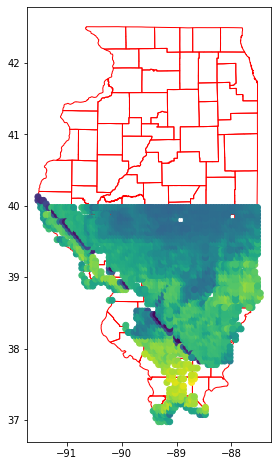

In [137]:
# Visualise 2010 evi 17
plot_evi_stacked_data(2010, "evi_17", figsize=8)

In [138]:
# Dictionary mean evi per evi_column
evi_columns = df_plot.columns[4:]
mean_evi_dict = dict()
for evi_column in evi_columns:
    temporary_series = df_plot[evi_column]
    mean_evi_dict[evi_column] = temporary_series.mean()


In [139]:
# Create dataframe from dict
mean_evi_dataframe =  pd.DataFrame().from_dict(mean_evi_dict, orient="index")
mean_evi_dataframe.reset_index(inplace=True)
mean_evi_dataframe.columns = ["evi_interval", "evi"]
mean_evi_dataframe

,evi_interval,evi
0,evi_1,0.142759
1,evi_17,0.039314
2,evi_33,0.111077
3,evi_49,0.100674
4,evi_65,0.145820
5,evi_81,0.171597
6,evi_97,0.204842
7,evi_113,0.254953
8,evi_129,0.269831
9,evi_145,0.301658


In [140]:
EVI_COLUMNS = list(evi_stacked.columns[4:])
EVI_INTERVAL_COLUMN = "evi_interval"
EVI_COLUMN = "evi"

def get_mean_evi_dictionary(dataframe):
    """
    Function returns dataframe showing mean interval EVI
    @param dataframe: stacked_evi dataframe
    @return: dictionary containing evi interval and evi mean
    """
    mean_evi_dict = dict()
    for evi_column in EVI_COLUMNS:
        temporary_series = dataframe[evi_column]
        mean_evi_dict[evi_column] = temporary_series.mean()
    return mean_evi_dict

def get_evi_dataframe_from_dictionary(dictionary):
    """

    @param dictionary:
    @return:
    """
    mean_evi_dataframe =  pd.DataFrame().from_dict(dictionary, orient="index")
    mean_evi_dataframe.reset_index(inplace=True)
    mean_evi_dataframe.columns = [EVI_INTERVAL_COLUMN, EVI_COLUMN]
    return mean_evi_dataframe

In [141]:
# Create dates for Evi interval
from datetime import datetime, timedelta

evi_1_date = "2019-01-01"
evi_1_date = datetime.strptime(evi_1_date, '%Y-%m-%d')

date_list = list()
date_list.append(evi_1_date)
current_evi_date = evi_1_date
for n in range(len(evi_columns)):
    date_more_16_days = (current_evi_date + timedelta(days=16))
    date_list.append(date_more_16_days)
    current_evi_date = date_more_16_days
date_list.pop(-1)

datetime.datetime(2020, 1, 4, 0, 0)

In [142]:
from datetime import datetime, timedelta
EVI_1_DATE = "2019-01-01"


def get_dates_from_evi_interval():
    """
    Function gets dates from evi interval
    @return: list of dates corresponding to evi interval
    """
    evi_1_date = datetime.strptime(EVI_1_DATE, '%Y-%m-%d')
    date_list = list()
    date_list.append(evi_1_date)
    current_evi_date = evi_1_date
    for n in range(len(evi_columns)):
        date_more_16_days = (current_evi_date + timedelta(days=16))
        date_list.append(date_more_16_days)
        current_evi_date = date_more_16_days
    date_list.pop(-1)
    return date_list

In [146]:
mean_evi_dataframe["date"] = date_list

In [147]:
# Plotly EVI
import plotly.graph_objects as go
dates = list(mean_evi_dataframe["date"])
evis = list(mean_evi_dataframe["evi"])

fig = go.Figure()
fig.add_trace(go.Scatter(x=dates, y=evis, mode='lines+markers', name='Evi', marker_color="#003f5c"))
fig.update_layout(
    title = 'EVI Over Time',
    autosize = False,
    width = 950,
    height = 600,
    margin = dict(
        l = 50,
        r = 50,
        b = 50,
        t = 100,
        pad = 2
    ),
    template = "plotly_white",
    hovermode='x'
)
fig.show()

In [144]:
evi_stacked_years = list(evi_stacked["year"].unique())
dates = get_dates_from_evi_interval()
written_dates = [x.strftime('%b-%d') for x in dates]

fig = go.Figure()
for year in evi_stacked_years:
    temporary_dataframe = evi_stacked[evi_stacked["year"] == year]
    mean_evi_dict = get_mean_evi_dictionary(temporary_dataframe)
    mean_evi_dataframe = get_evi_dataframe_from_dictionary(mean_evi_dict)
    evis = list(mean_evi_dataframe["evi"])
    fig.add_trace(go.Scatter(x=written_dates, y=evis, mode='lines+markers', name=str(year)))

# Dataframe average
mean_evi_dict = get_mean_evi_dictionary(evi_stacked)
mean_evi_dataframe = get_evi_dataframe_from_dictionary(mean_evi_dict)
evis = list(mean_evi_dataframe["evi"])
fig.add_trace(go.Scatter(x=written_dates, y=evis, mode='lines+markers', name="mean"))
fig.update_layout(
    title = 'EVI Over Time',
    autosize = False,
    width = 950,
    height = 600,
    margin = dict(
        l = 50,
        r = 50,
        b = 50,
        t = 100,
        pad = 2
    ),
    template = "plotly_white"
)
fig.write_html("../references/visualisations/evi_over_time.html")
fig.show()

## ERA5

In [153]:
era5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328680 entries, 0 to 328679
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   lat     328680 non-null  float64
 1   long    328680 non-null  float64
 2   time    328680 non-null  object 
 3   t2m     328680 non-null  float64
 4   county  328680 non-null  object 
dtypes: float64(3), object(2)
memory usage: 12.5+ MB


In [155]:
era5["time"] = pd.to_datetime(era5["time"])
era5["year"] = era5["time"].dt.year
era5["month"] = era5["time"].dt.month
era5["day"] = era5["time"].dt.day

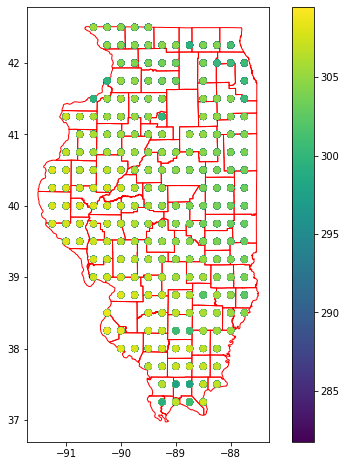

In [169]:
era5_plot = era5[era5["month"] == 6]
fig, ax = plt.subplots(figsize=(8, 8))
geo_dataframe.plot(ax=ax, facecolor='none', edgecolor='red')
plt.scatter(era5_plot["long"], era5_plot["lat"], c=era5_plot["t2m"])
plt.colorbar()

In [179]:
# Kelvin to C
celsius = [x - 273.15 for x in era5["t2m"]]
era5["c_t2m"] = celsius
era5

,lat,long,time,t2m,county,year,month,day,c_t2m
0,42.50,-90.5,1989-01-01,268.996185,JO DAVIESS,1989,1,1,-4.153815
1,42.50,-90.5,1989-01-15,271.925720,JO DAVIESS,1989,1,15,-1.224280
2,42.50,-90.5,1989-01-28,276.593048,JO DAVIESS,1989,1,28,3.443048
3,42.50,-90.5,1989-02-01,282.042358,JO DAVIESS,1989,2,1,8.892358
4,42.50,-90.5,1989-02-15,269.375763,JO DAVIESS,1989,2,15,-3.774237
...,...,...,...,...,...,...,...,...,...
328675,37.25,-89.0,2012-11-15,278.565491,PULASKI,2012,11,15,5.415491
328676,37.25,-89.0,2012-11-28,274.160889,PULASKI,2012,11,28,1.010889
328677,37.25,-89.0,2012-12-01,285.636108,PULASKI,2012,12,1,12.486108
328678,37.25,-89.0,2012-12-15,282.508789,PULASKI,2012,12,15,9.358789


In [201]:
# Get dates
temporary_dataframe = era5[era5["year"] == 1989]
era5_dates = temporary_dataframe["time"].unique()
era5_pandas_datetime = [pd.to_datetime(str(x)) for x in era5_dates]
era5_written_dates = [x.strftime('%b-%d') for x in era5_pandas_datetime]

In [210]:
# Get dates
temporary_dataframe = era5[era5["year"] == 1989]
era5_dates = temporary_dataframe["time"].unique()
era5_pandas_datetime = [pd.to_datetime(str(x)) for x in era5_dates]
era5_written_dates = [x.strftime('%b-%d') for x in era5_pandas_datetime]

fig = go.Figure()
for year in sorted(list(era5["year"].unique())):
    temporary_dataframe = era5[era5["year"] == year]
    celsius_date = list()
    for date in list(temporary_dataframe["time"].unique()):
        date_temporary_dataframe = temporary_dataframe[temporary_dataframe["time"] == date]
        celsius_at_date = date_temporary_dataframe["c_t2m"].mean()
        celsius_date.append(celsius_at_date)
    fig.add_trace(go.Scatter(x=era5_written_dates, y=celsius_date, mode='lines+markers', name=str(year)))
fig.update_layout(
    title = 'Celsius T2M',
    autosize = False,
    width = 950,
    height = 600,
    margin = dict(
        l = 50,
        r = 50,
        b = 50,
        t = 100,
        pad = 2
    ),
    template = "plotly_white"
)
fig.write_html("../references/visualisations/celsius_t2m_over_time.html")
fig.show()

## Yield per County


In [ ]:
def plot_evi_stacked_data(year, evi, figsize=8):
    """

    @param year:
    @param evi:
    @param figsize:
    @return:
    """
    df_plot = evi_stacked[evi_stacked["year"] == year]
    fig, ax = plt.subplots(figsize=(figsize, figsize))
    geo_dataframe.plot(ax=ax, facecolor='none', edgecolor='red')
    plt.scatter(df_plot["long"], df_plot["lat"], c=df_plot[evi])

In [222]:
yield_per_country = il_yield.copy()
yield_per_country

,year,county,yield
0,2019,LOGAN,194.2
1,2019,MACON,204.4
2,2019,MARSHALL,184.9
3,2019,MASON,169.0
4,2019,MCLEAN,198.8
...,...,...,...
9617,1925,MONTGOMERY,39.0
9618,1925,MORGAN,47.0
9619,1925,PIKE,43.0
9620,1925,SANGAMON,41.0


In [223]:
lat_long_country = evi_stacked[["lat", "long", "county"]]
lat_long_country

,lat,long,county
0,40.075,-91.525,ADAMS
1,40.125,-91.525,ADAMS
2,40.175,-91.525,ADAMS
3,40.225,-91.525,ADAMS
4,39.975,-91.475,ADAMS
...,...,...,...
95413,40.875,-88.975,WOODFORD
95414,40.925,-88.975,WOODFORD
95415,40.825,-88.925,WOODFORD
95416,40.875,-88.925,WOODFORD


In [226]:
county_lat_long_mean = lat_long_country.groupby("county").mean()
county_lat_long_mean.reset_index(inplace=True)

In [237]:
yield_per_county_with_lat_long = pd.merge(left=yield_per_country, right=county_lat_long_mean,
                                    on="county", how="left")
yield_per_county_with_lat_long

,year,county,yield,lat,long
0,2019,LOGAN,194.2,40.128704,-89.366043
88,2018,LOGAN,236.2,40.128704,-89.366043
178,2017,LOGAN,213.0,40.128704,-89.366043
278,2016,LOGAN,219.4,40.128704,-89.366043
374,2015,LOGAN,172.8,40.128704,-89.366043
...,...,...,...,...,...
9113,1929,LOGAN,41.0,40.128704,-89.366043
9215,1928,LOGAN,42.0,40.128704,-89.366043
9317,1927,LOGAN,39.0,40.128704,-89.366043
9419,1926,LOGAN,38.0,40.128704,-89.366043


In [253]:
def plot_yield_per_country_year(year, figsize=14):
    """

    @param year:
    @param figsize:
    @return:
    """
    df_plot = yield_per_county_with_lat_long[yield_per_county_with_lat_long["year"] == year]
    fig, ax = plt.subplots(figsize=(figsize, figsize))
    geo_dataframe.plot(ax=ax, facecolor='none', edgecolor='red')
    plt.scatter(df_plot["long"], df_plot["lat"], c=df_plot["yield"], s=100)
    plt.colorbar()

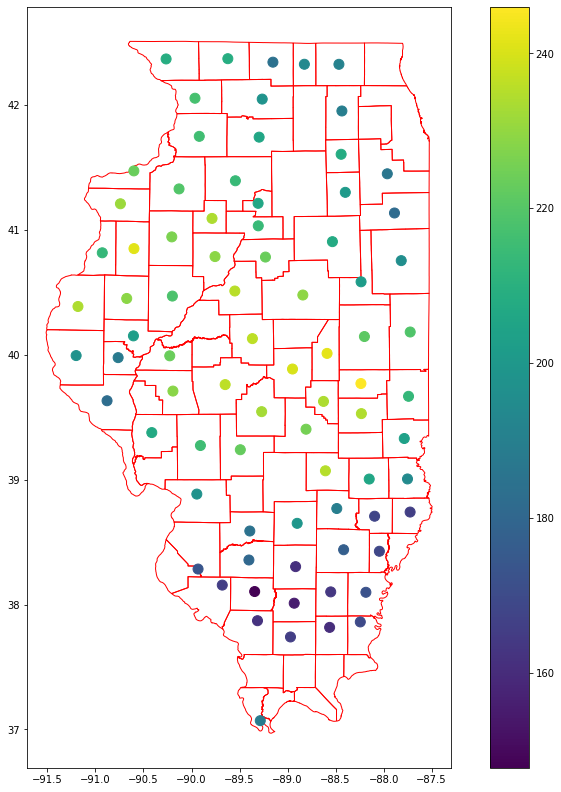

In [254]:
plot_yield_per_country_year(2018)